## Goal

One of the key assumptions of any linear model is **homoscedasticity**, which-- apart from being a $2 word that I need to spellcheck every time-- means that *the variance of your error terms stays generally-consistent across all fitted values.*

Thus, it becomes essential to collect your error residuals and examine them against your predicted values. And if you're being *really* diligent, your independent `X` variables, as well.

Visually, this basically means that we want to see the former, not the latter, of the two pictures below.

Populating the interactive namespace from numpy and matplotlib


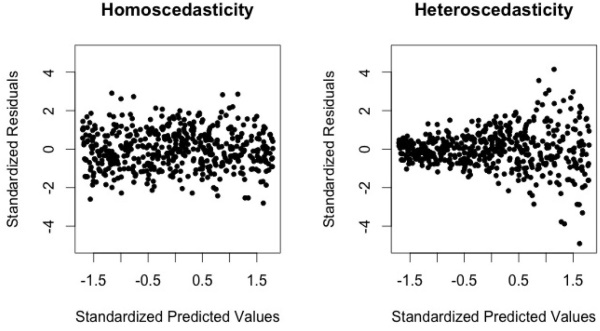

In [1]:
%pylab inline
from IPython.display import Image

Image('images/scedasticity.jpg')

**Note**: The "funnel shape" of the dataset showing Heteroscedasticity

## A Practical Example

In researching the easiest way to put these plots together in Python, I stumbled upon the [Yellowbrick](https://www.scikit-yb.org/en/latest/) library. It provides, among other things, a nice visualization wrapper around `sklearn` objects for doing visual, statistical inference.

Borrowing from their docs, we'll load one of their sample datasets, fit a simple model, then show its residual plot.

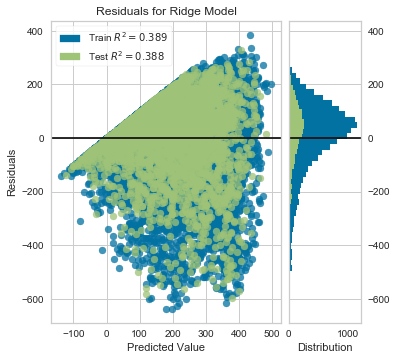

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_bikeshare
from yellowbrick.regressor import ResidualsPlot

X, y = load_bikeshare()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model, size=(400, 400))

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof();

As you can see, there's a very clear "funnel shape" that demonstrates *hetero*scedasticity in our data. Furthermore, we can tell by looking at the histogram to the right that the residual values aren't even centered around `0`.

To address this, the authors of of [ISL](https://smile.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370?sa-no-redirect=1) advocate for applying some concave (downward-curved) function to our target variable, `y`, to shrink the error in the larger responses.

### Scaling

The `log` function is a typical candidate for a transformation function, as it has the concave shape we're looking for

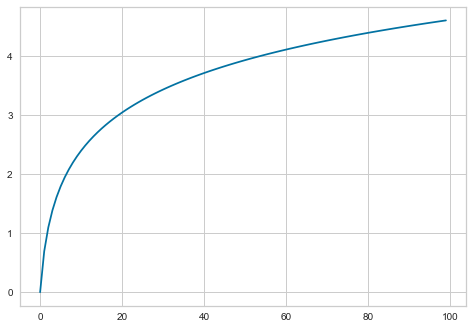

In [3]:
X = np.log(np.linspace(1, 100, 100))
plt.plot(X);

Same code block as above, except we run all of the `y` values through `np.log()`

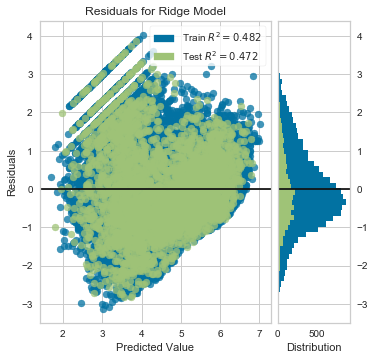

In [4]:
X, y = load_bikeshare()
scaled_y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, scaled_y, test_size=0.2, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model, size=(400, 400))

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

However, it appears that not only did we overshoot wrenching the mean residual value down, we also created what looks to be a "reverse-funnel" after `~4` on the X-axis.

What about the square root function?

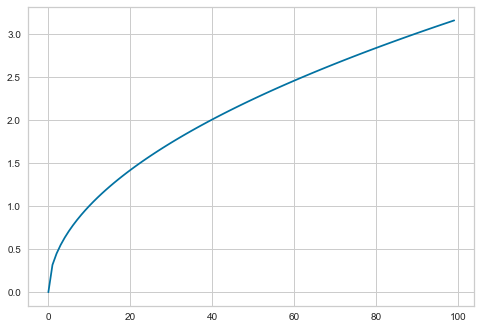

In [5]:
X = np.sqrt(np.linspace(0, 10, 100))
plt.plot(X);

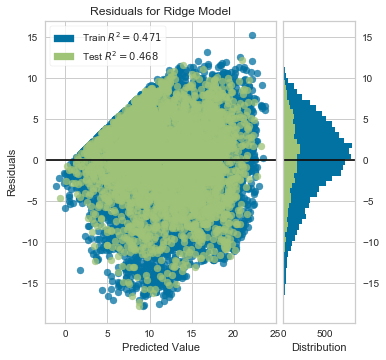

In [6]:
X, y = load_bikeshare()
scaled_y = np.sqrt(y)

X_train, X_test, y_train, y_test = train_test_split(X, scaled_y, test_size=0.2, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model, size=(400, 400))

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

Better, but we still have a distrinct pickup before `10` or so. We could also examine the residuals against each of our features, but it's probably worth trying a non-linear model at this point, as it might be better-suited for this problem